# Chargement des données : Sport !


In [10]:
!git clone https://github.com/MartinBoniol/DeepLearnig_Project
path = "./DeepLearnig_Project/Partition/"

fatal: destination path 'DeepLearnig_Project' already exists and is not an empty directory.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. Si vous avez construit votre arborescence de la même manière que la mienne, et que vous adaptez les noms de labels à votre projet, alors le code suivant devrait être utilisable directement.

In [11]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='Apprentissage', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [12]:
labels = ['Basket', 'Tennis', 'Foot', 'Hockey']

x_apprentissage, y_apprentissage = load_data(path, labels, dataset='Apprentissage', image_size=64)
print(x_apprentissage.shape, y_apprentissage.shape)

x_val, y_val = load_data(path, labels, dataset='Validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='Test', image_size=64)
print(x_test.shape, y_test.shape)

(560, 64, 64, 3) (560, 1)
(120, 64, 64, 3) (120, 1)
(120, 64, 64, 3) (120, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

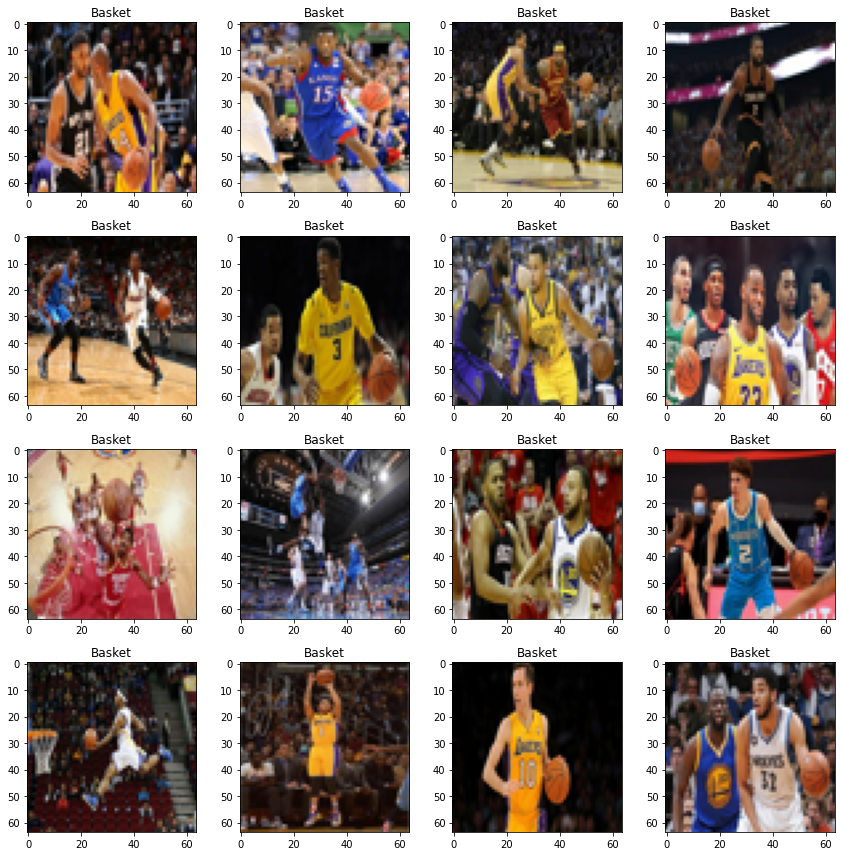

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(16)
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    image = x_val[shuffle_indices[i]]
    plt.title(labels[int(y_val[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()